Dimensions : (1000, 40)
--- DIMENSIONS ---
Lignes: 1000, Colonnes: 40

--- VALEURS MANQUANTES ---
collision_type              178
authorities_contacted        91
property_damage             360
police_report_available     343
_c39                       1000
dtype: int64

--- DISTRIBUTION DE LA CIBLE ---
fraud_reported
0    0.753
1    0.247
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_3560\2890965723.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_reported', data=df, palette='pastel')


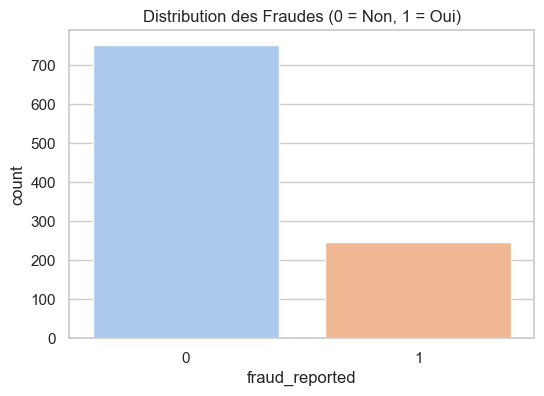

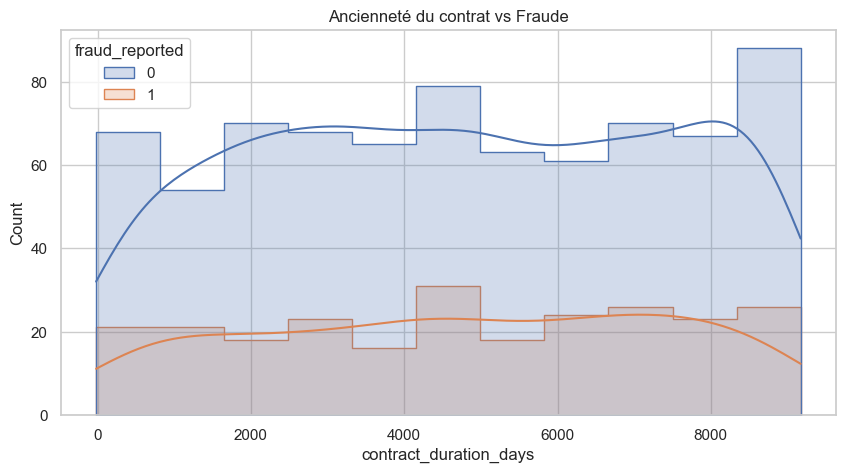

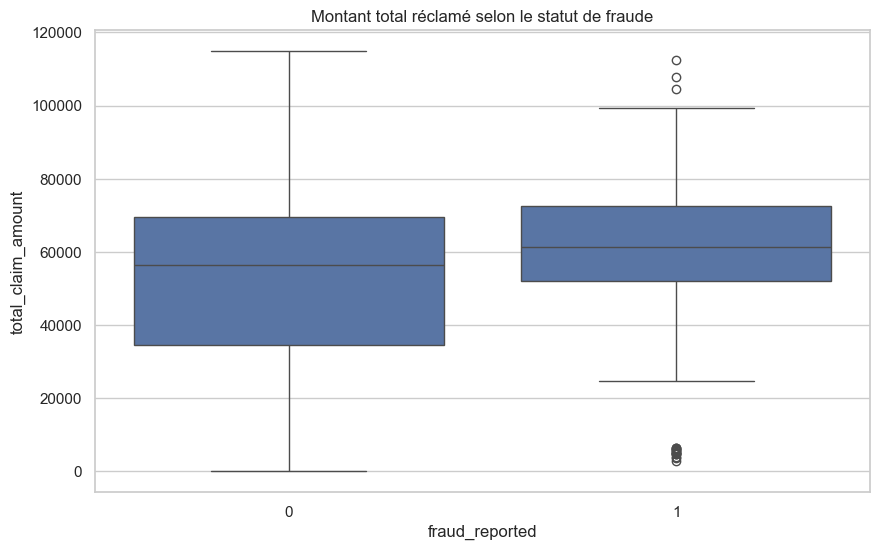

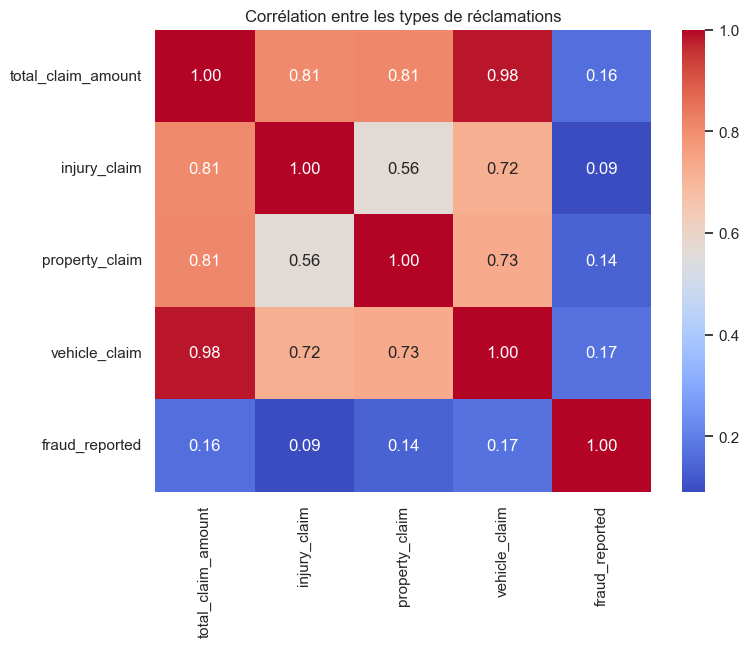

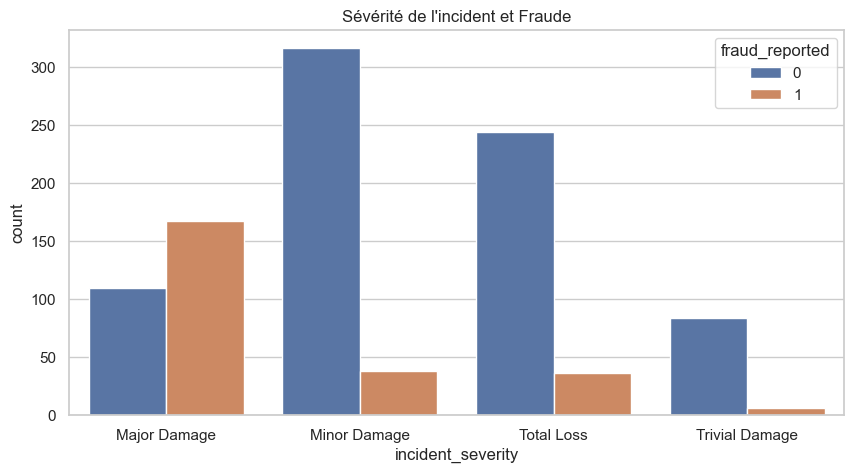

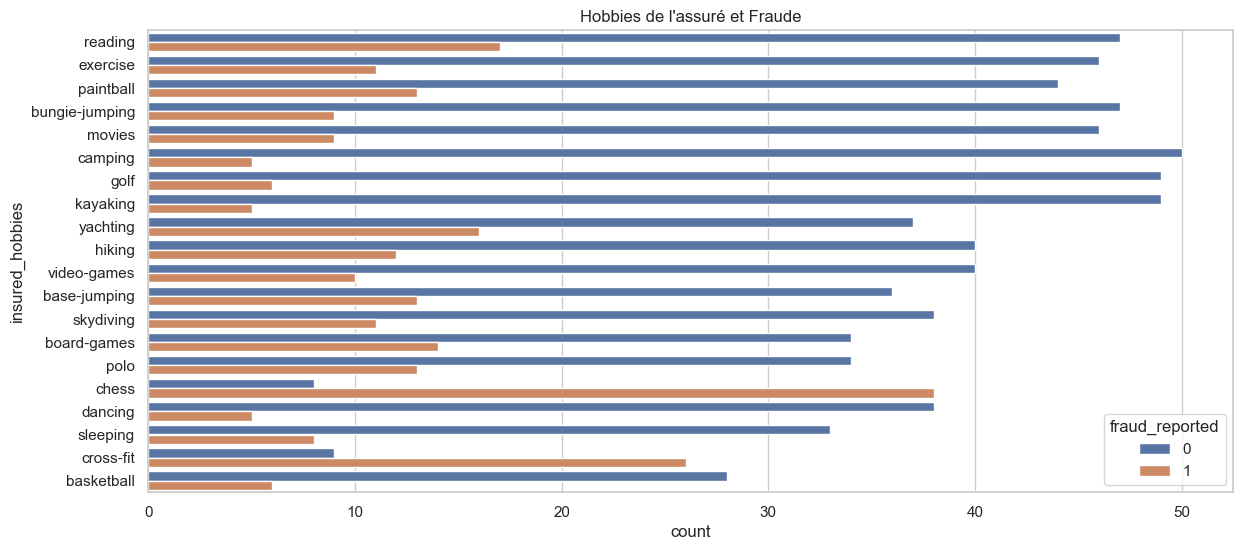

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




# Remplacez 'insurance_claims.csv' par le vrai nom de votre fichier
# L'argument na_values='?' transforme automatiquement les '?' en valeurs vides (NaN)
df = pd.read_csv('insurance_claims.csv', na_values='?')

# Vérifier
print(f"Dimensions : {df.shape}")
df.head()
# Configuration du style des graphiques
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ---------------------------------------------------------
# 1. CHARGEMENT ET APERÇU
# ---------------------------------------------------------
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier
# df = pd.read_csv('votre_fichier.csv')

# Pour l'exemple, assurons-nous que les valeurs manquantes "?" sont gérées
# (Dans ce dataset spécifique, les manquants sont souvent notés "?")
df = df.replace('?', np.nan)

print("--- DIMENSIONS ---")
print(f"Lignes: {df.shape[0]}, Colonnes: {df.shape[1]}")

print("\n--- VALEURS MANQUANTES ---")
print(df.isnull().sum()[df.isnull().sum() > 0])

# ---------------------------------------------------------
# 2. PRÉPARATION DE LA CIBLE (TARGET)
# ---------------------------------------------------------
# On convertit Y/N en 1/0 pour faciliter les calculs
if df['fraud_reported'].dtype == 'object':
    df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

print("\n--- DISTRIBUTION DE LA CIBLE ---")
print(df['fraud_reported'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_reported', data=df, palette='pastel')
plt.title('Distribution des Fraudes (0 = Non, 1 = Oui)')
plt.show()

# ---------------------------------------------------------
# 3. ANALYSE TEMPORELLE (Dates)
# ---------------------------------------------------------
# Conversion des colonnes dates en format datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Création d'une nouvelle variable : Ancienneté du contrat avant l'accident
df['contract_duration_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='contract_duration_days', hue='fraud_reported', kde=True, element="step")
plt.title('Ancienneté du contrat vs Fraude')
plt.show()

# ---------------------------------------------------------
# 4. ANALYSE DES MONTANTS (Relations Numériques)
# ---------------------------------------------------------
# Vérifions si les gros montants sont plus souvent frauduleux
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Montant total réclamé selon le statut de fraude')
plt.show()

# Matrice de corrélation pour voir les liens entre les différents montants
# On sélectionne les colonnes numériques pertinentes
num_cols = ['total_claim_amount', 'injury_claim', 'property_claim', 
            'vehicle_claim', 'fraud_reported']
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les types de réclamations')
plt.show()

# ---------------------------------------------------------
# 5. ANALYSE CATÉGORIELLE (Relations Qualitatives)
# ---------------------------------------------------------
# Variable critique : Sévérité de l'incident
plt.figure(figsize=(10, 5))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title("Sévérité de l'incident et Fraude")
plt.show()

# Variable intéressante : Hobbies (Spécifique à ce dataset)
# Certains hobbies comme 'chess' ou 'cross-fit' ont parfois des taux bizarres
plt.figure(figsize=(14, 6))
sns.countplot(y='insured_hobbies', hue='fraud_reported', data=df, order=df['insured_hobbies'].value_counts().index)
plt.title("Hobbies de l'assuré et Fraude")
plt.show()

In [3]:
# 1. Suppression de la colonne poubelle '_c39'
# On vérifie d'abord si elle existe pour éviter une erreur si vous relancez le code
if '_c39' in df.columns:
    df.drop('_c39', axis=1, inplace=True)
    print("Colonne '_c39' supprimée avec succès.")

# 2. Remplacer les valeurs manquantes par 'Unknown'
# Liste des colonnes à nettoyer
cols_to_fix = ['collision_type', 'property_damage', 
               'police_report_available', 'authorities_contacted']

# On remplit les NaN (Not a Number) par la chaîne de caractères "Unknown"
for col in cols_to_fix:
    df[col] = df[col].fillna('Unknown')
    print(f"Valeurs manquantes traitées pour : {col}")

# 3. Vérification finale
print("\n--- Compte des valeurs manquantes restantes ---")
print(df.isnull().sum().sum()) 
# Le résultat doit être 0. Si c'est 0, votre base est techniquement "propre".

Colonne '_c39' supprimée avec succès.
Valeurs manquantes traitées pour : collision_type
Valeurs manquantes traitées pour : property_damage
Valeurs manquantes traitées pour : police_report_available
Valeurs manquantes traitées pour : authorities_contacted

--- Compte des valeurs manquantes restantes ---
0


In [4]:
# 1. Sauvegarder le DataFrame 'df' dans un nouveau fichier
# index=False est TRÈS important : cela évite de créer une colonne inutile avec les numéros de lignes
df.to_csv('insurance_claims_clean.csv', index=False)


In [5]:
# Script d'analyse des colonnes "Inutiles"

# 1. Vérifier les valeurs uniques (Cardinalité)
print("--- Analyse des Valeurs Uniques ---")
for col in df.columns:
    unique_count = df[col].nunique()
    total_rows = len(df)
    
    # Si chaque ligne a une valeur unique (ID)
    if unique_count == total_rows:
        print(f"ALERTE ID UNIQUE : '{col}' a {unique_count} valeurs uniques (Candidat à la suppression)")
        
    # Si la colonne n'a qu'une seule valeur (Constante)
    elif unique_count == 1:
        print(f"ALERTE CONSTANTE : '{col}' n'a qu'une seule valeur (Candidat à la suppression)")

    # Pour voir les colonnes avec trop de catégories (ex: > 500)
    elif unique_count > 500 and df[col].dtype == 'object':
        print(f"ALERTE COMPLEXITÉ : '{col}' a {unique_count} catégories textuelles (Trop complexe ?)")

# 2. Vérifier les Corrélations (Redondance)
# On regarde seulement les colonnes numériques
print("\n--- Analyse des Corrélations Fortes (> 0.9) ---")
corr_matrix = df.select_dtypes(include=['number']).corr().abs()

# On parcourt la matrice pour trouver les paires très liées
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

if len(high_corr_var) > 0:
    for pair in high_corr_var:
        print(f"ALERTE REDONDANCE : {pair[0]} et {pair[1]} sont très corrélés.")
else:
    print("Pas de redondance évidente détectée.")

--- Analyse des Valeurs Uniques ---
ALERTE ID UNIQUE : 'policy_number' a 1000 valeurs uniques (Candidat à la suppression)
ALERTE ID UNIQUE : 'incident_location' a 1000 valeurs uniques (Candidat à la suppression)

--- Analyse des Corrélations Fortes (> 0.9) ---
ALERTE REDONDANCE : months_as_customer et age sont très corrélés.
ALERTE REDONDANCE : total_claim_amount et vehicle_claim sont très corrélés.


In [6]:
# --- SÉLECTION DES VARIABLES (FEATURE SELECTION) ---

# Liste des colonnes identifiées comme inutiles ou redondantes
cols_to_remove = [
    'policy_number',       # ID unique
    'incident_location',   # ID unique (trop complexe)
    'age',                 # Redondant avec months_as_customer
    'total_claim_amount'   # Redondant (c'est la somme des autres claims)
]

# Suppression
# On utilise errors='ignore' pour éviter un crash si vous avez déjà supprimé une colonne par erreur
df = df.drop(cols_to_remove, axis=1, errors='ignore')

print(f"Colonnes supprimées : {cols_to_remove}")
print(f"Nouvelles dimensions de la base : {df.shape}")

Colonnes supprimées : ['policy_number', 'incident_location', 'age', 'total_claim_amount']
Nouvelles dimensions de la base : (1000, 36)


count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64


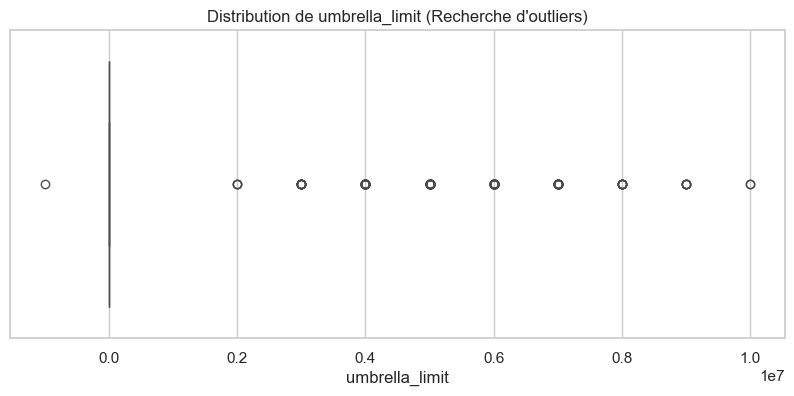

In [7]:
# --- ETAPE : ANALYSE DES OUTLIERS (UMBRELLA_LIMIT) ---

# 1. Statistiques descriptives
print(df['umbrella_limit'].describe())

# 2. Visualisation avec un Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['umbrella_limit'])
plt.title('Distribution de umbrella_limit (Recherche d\'outliers)')
plt.show()

Le seuil des 99% est à : 8000000.0
Nombre de valeurs au-dessus du seuil : 7
Outliers de 'umbrella_limit' traités (plafonnés).


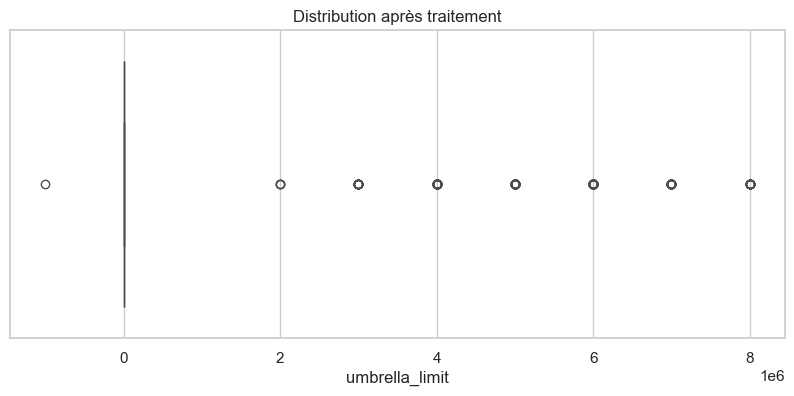

In [8]:
# --- ETAPE : TRAITEMENT (CAPPING) ---

# Calculons la limite haute (ex: le seuil où se trouvent 99% des gens)
upper_limit = df['umbrella_limit'].quantile(0.99)
print(f"Le seuil des 99% est à : {upper_limit}")

# On regarde combien de lignes dépassent ce seuil
outliers_count = df[df['umbrella_limit'] > upper_limit].shape[0]
print(f"Nombre de valeurs au-dessus du seuil : {outliers_count}")

# TRAITEMENT : On ramène tout ce qui dépasse le seuil À la valeur du seuil
# (Comme ça, on ne perd pas l'info que c'est un "gros client", mais il ne casse plus le modèle)
df.loc[df['umbrella_limit'] > upper_limit, 'umbrella_limit'] = upper_limit

print("Outliers de 'umbrella_limit' traités (plafonnés).")

# Vérification graphique après traitement
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['umbrella_limit'])
plt.title('Distribution après traitement')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# 1. Identifier les colonnes numériques à standardiser
# On prend les chiffres (number), mais on EXCLUT la cible 'fraud_reported'
cols_to_scale = df.select_dtypes(include=['number']).columns.tolist()

if 'fraud_reported' in cols_to_scale:
    cols_to_scale.remove('fraud_reported')

print(f"Colonnes qui seront standardisées : {cols_to_scale}")

# 2. Initialiser le Scaler
scaler = StandardScaler()

# 3. Appliquer la transformation
# On remplace les anciennes valeurs par les nouvelles valeurs standardisées
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\n--- STANDARDISATION TERMINÉE ---")

# 4. Vérification
# Après standardisation, la moyenne (mean) doit être proche de 0
# et l'écart-type (std) doit être proche de 1.
print(df[cols_to_scale].describe().loc[['mean', 'std']].round(2))

Colonnes qui seront standardisées : ['months_as_customer', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'contract_duration_days']

--- STANDARDISATION TERMINÉE ---
      months_as_customer  policy_deductable  policy_annual_premium  \
mean                -0.0               -0.0                    0.0   
std                  1.0                1.0                    1.0   

      umbrella_limit  insured_zip  capital-gains  capital-loss  \
mean             0.0         -0.0            0.0           0.0   
std              1.0          1.0            1.0           1.0   

      incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
mean                      -0.0                          0.0             -0.0   
std                        1.0              

In [10]:
# --- SOLUTION : SUPPRESSION DES VARIABLES PARASITES ---

# Liste des colonnes à supprimer
cols_to_drop_final = ['insured_zip', 'auto_year']

# On les supprime (errors='ignore' évite un bug si vous l'avez déjà fait)
df = df.drop(cols_to_drop_final, axis=1, errors='ignore')

print("✅ Colonnes 'insured_zip' et 'auto_year' supprimées.")
print(f"Dimensions actuelles de la base : {df.shape}")

✅ Colonnes 'insured_zip' et 'auto_year' supprimées.
Dimensions actuelles de la base : (1000, 34)


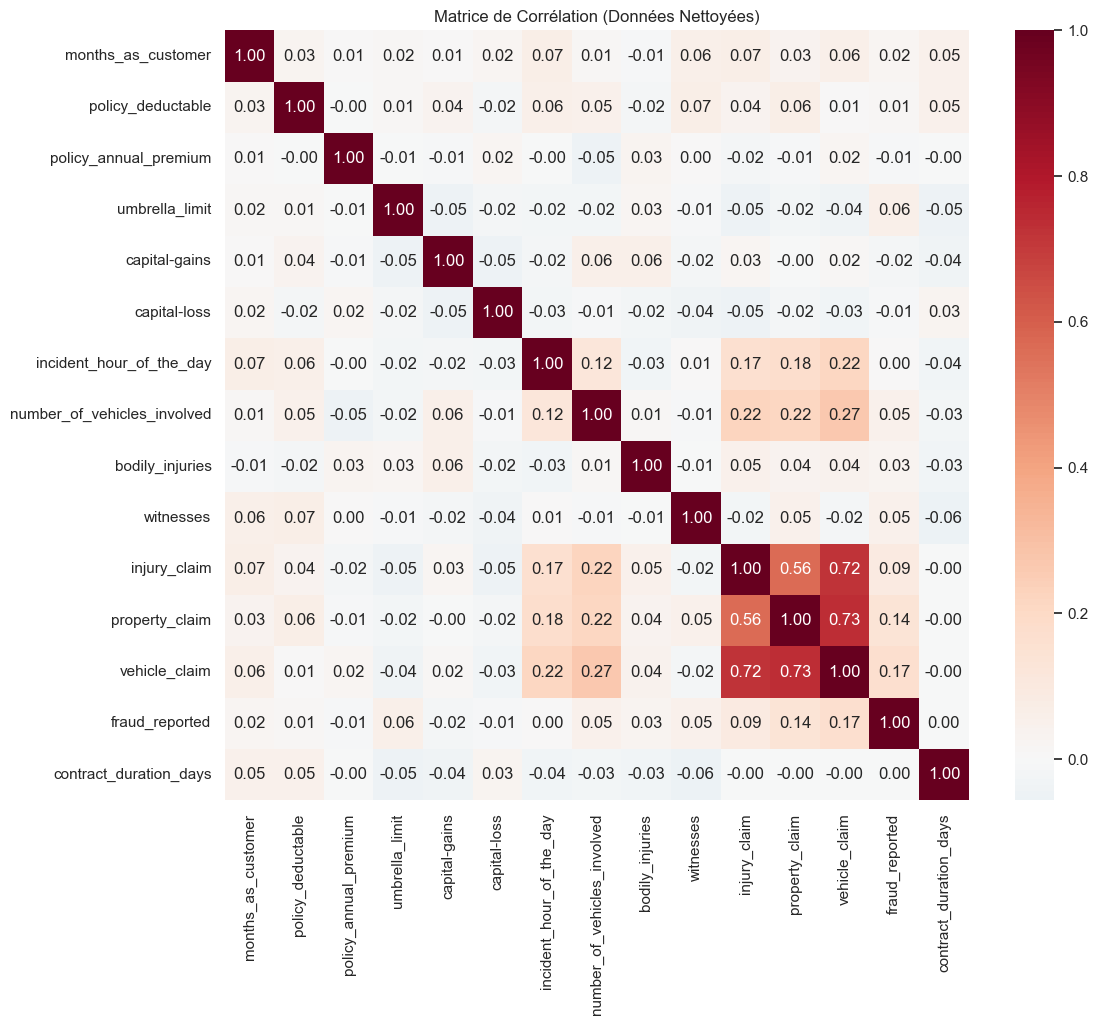

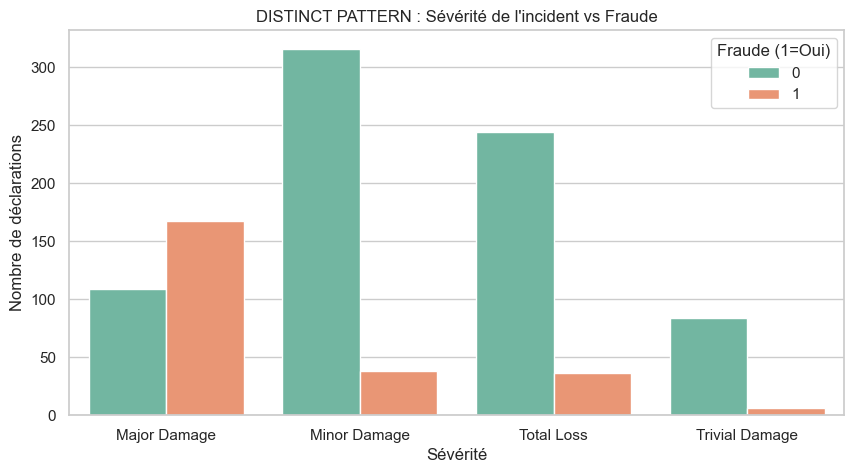

C:\Users\user\AppData\Local\Temp\ipykernel_3560\1939403698.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_reported', y='vehicle_claim', data=df, palette='pastel')


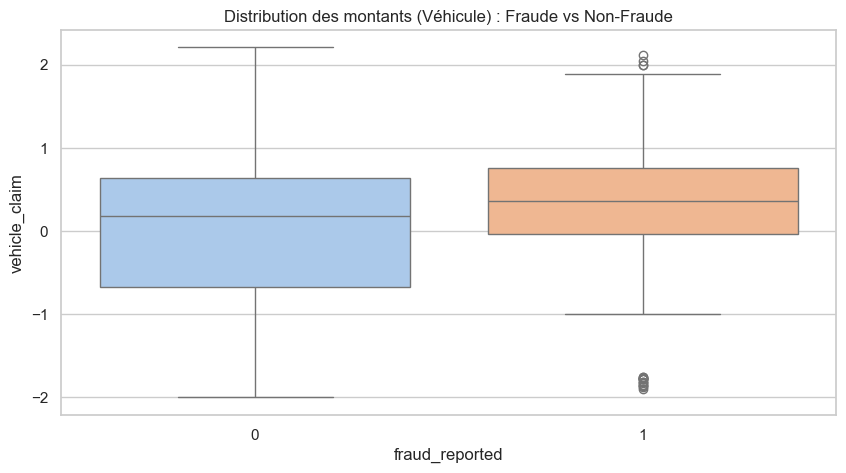

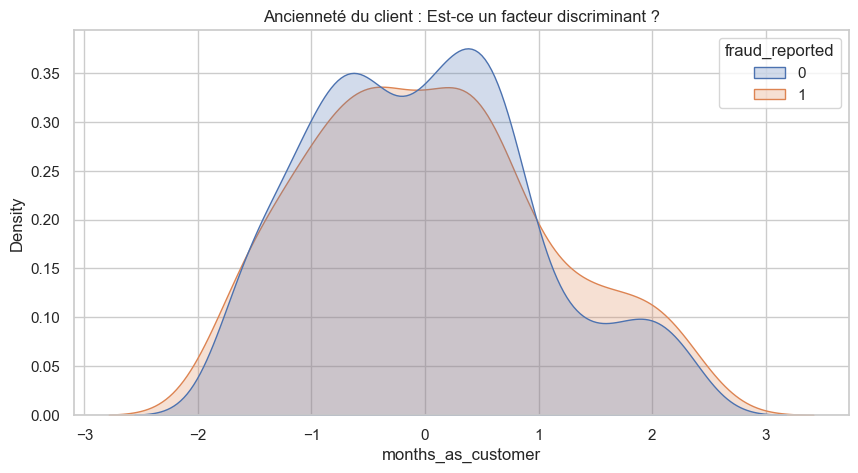

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour que les graphiques soient lisibles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. MATRICE DE CORRÉLATION (Relations numériques) ---
# Objectif : Voir quelles variables montent quand la fraude monte.
# On ne prend que les variables numériques restantes
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
# On utilise la méthode de corrélation de Spearman (mieux pour les relations non-linéaires)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Matrice de Corrélation (Données Nettoyées)')
plt.show()

# --- 2. LE "SMOKING GUN" (Motif Distinctif N°1 : Sévérité) ---
# Consigne : "Identify features that exhibit distinct patterns"
# L'hypothèse : Les "Total Loss" (perte totale) sont-ils plus souvent frauduleux ?
plt.figure(figsize=(10, 5))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df, palette='Set2')
plt.title('DISTINCT PATTERN : Sévérité de l\'incident vs Fraude')
plt.xlabel('Sévérité')
plt.ylabel('Nombre de déclarations')
plt.legend(title='Fraude (1=Oui)')
plt.show()

# --- 3. ANALYSE DES MONTANTS (Motif Distinctif N°2 : Coûts) ---
# Puisqu'on a supprimé 'total_claim', regardons 'vehicle_claim' qui est le plus gros morceau.
plt.figure(figsize=(10, 5))
sns.boxplot(x='fraud_reported', y='vehicle_claim', data=df, palette='pastel')
plt.title('Distribution des montants (Véhicule) : Fraude vs Non-Fraude')
plt.show()

# --- 4. ANALYSE TEMPORELLE (Motif Distinctif N°3 : Le cycle de vie) ---
# Les nouveaux clients sont-ils plus risqués ?
plt.figure(figsize=(10, 5))
# KDE Plot permet de voir la forme de la distribution (densité)
sns.kdeplot(data=df, x='months_as_customer', hue='fraud_reported', fill=True, common_norm=False)
plt.title('Ancienneté du client : Est-ce un facteur discriminant ?')
plt.show()